# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

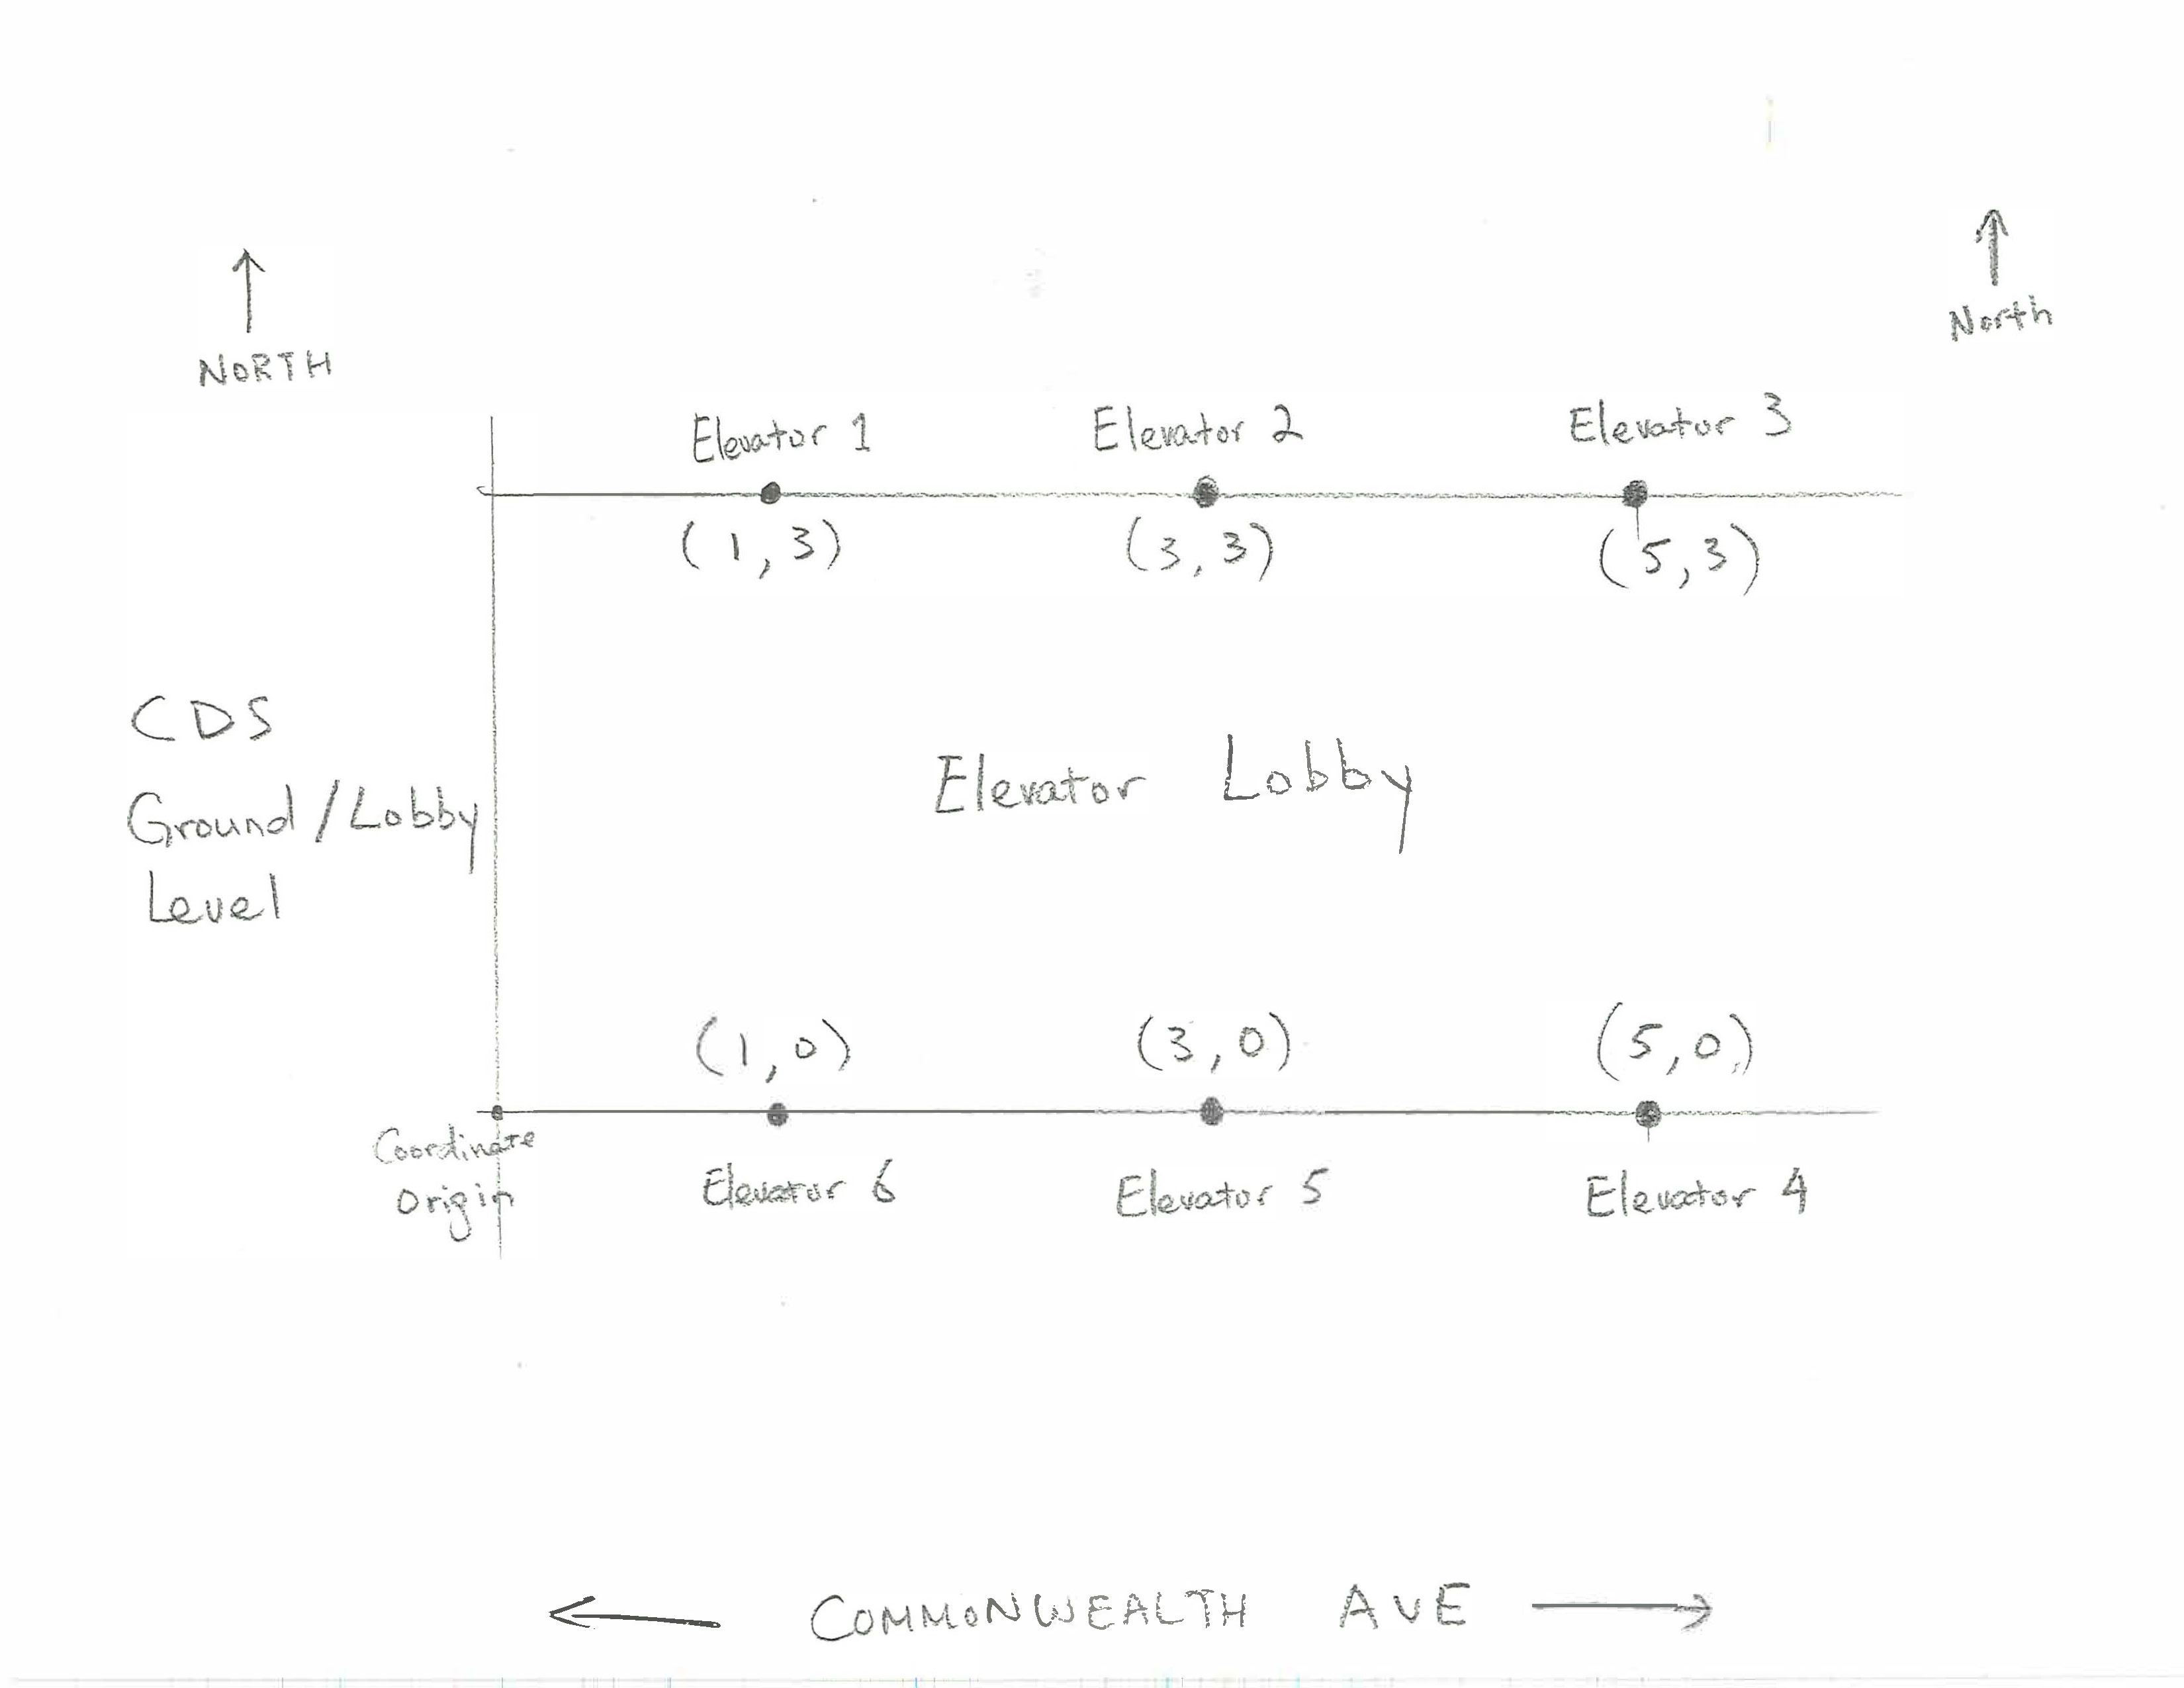

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

**Answer:** You should wait at (3,1.5) to be minimize the distance to all the elevators since this is at the center of the convex hull formed by the elevator location vertices.

**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

/home/ross/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


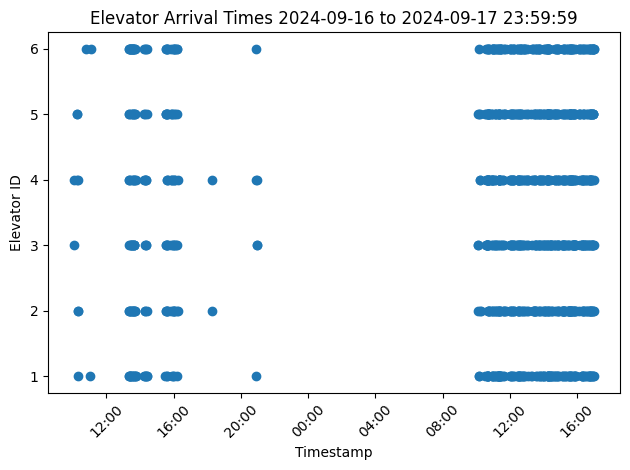

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter

filename = 'CDS Elevator Arrivals (Responses) - Form Responses 1.csv'
df = pd.read_csv(filename)

# Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

def plot_in_range(start_date, end_date):
    filtered_df = df[df['Timestamp'].between(start_date, end_date)]

    # Plotting
    fig, ax = plt.subplots()
    ax.scatter(filtered_df['Timestamp'], filtered_df['Elevator ID'])

    # Formatting the plot
    ax.set_title(f'Elevator Arrival Times {start_date} to {end_date}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Elevator ID')

    # Set x-axis major formatter to display time properly
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    plt.tight_layout()
    plt.show()
    
start_date = '2024-09-16'
end_date = '2024-09-17 23:59:59'
plot_in_range(start_date, end_date)


State observations here (briefly).

Monday is more sparsely concentrated. Tuesday is busier. It seems elevators 2 and 5 may be stationed further from the base floor since they have a little bit less usage in the late day compared to elevators 1,3,4,6. Perhaps these elevators (1,3,4,6) are near the upper floors so faculty take them down near the end of the day (i.e. 8pm).

**Question 3**: Make a table listing the average *frequency*
for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [2]:
def get_freq_table(start_date, end_date, gaps):
    filtered_df = df[df['Timestamp'].between(start_date, end_date)]

    # Assuming we know the data collection gaps manually (e.g., no data from 1-2pm)
    # You can adjust these gaps based on your actual knowledge of collection gaps

    # Calculate the total collection time excluding gaps
    collection_start = pd.to_datetime(start_date)
    collection_end = pd.to_datetime(end_date)

    total_time = (collection_end - collection_start).total_seconds()

    # Subtract time gaps from total_time
    for gap_start, gap_end in gaps:
        gap_start = pd.to_datetime(gap_start)
        gap_end = pd.to_datetime(gap_end)
        total_time -= (gap_end - gap_start).total_seconds()

    # Count arrivals per elevator
    elevator_counts = filtered_df['Elevator ID'].value_counts()

    # Calculate the frequency (arrivals per second) for each elevator
    elevator_frequencies = elevator_counts / total_time

    # Create a table of results
    frequency_table = pd.DataFrame({
        'Elevator ID': elevator_frequencies.index,
        'Arrivals per Second': elevator_frequencies.values
    })
    return frequency_table

gaps = [
    ('2024-09-16 00:00:00', '2024-09-16 08:00:00'),  # morning gap 9/16
    ('2024-09-16 22:00:00', '2024-09-17 08:00:00'),  # overnight gap 9/16-17
    ('2024-09-17 17:00:00', '2024-09-17 23:59:59'),  # night gap 9/17
]
frequency_table = get_freq_table(start_date, end_date, gaps)
print(frequency_table)

   Elevator ID  Arrivals per Second
0            3             0.002053
1            4             0.002029
2            5             0.002017
3            2             0.001957
4            6             0.001920
5            1             0.001872


**Answer:**

Based on the above, elevators 1,6,2 have lower arrival rates in this respective order (ascending order). The more frequent arrivals are from elevators 5,4,3 in this order (ascending order). Therefore, it makes sense to stand in the centroid of the right triangle formed by these elevator vertices. Realistically, the optimal standing point is is an optimization problem such that the cost is decreased in inverse proportion to frequency * distance.

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

In [3]:
def get_prob_table(elevator_frequencies):   
    # Calculate total frequency
    total_frequency = elevator_frequencies['Arrivals per Second'].sum()

    # Calculate probability for each elevator
    probability_table = elevator_frequencies.copy()
    probability_table.rename(columns={'Arrivals per Second': 'Probability of Next Arrival'}, inplace=True)
    probability_table['Probability of Next Arrival'] /= total_frequency
    return probability_table


probability_table = get_prob_table(frequency_table)
# Display the table
print(probability_table)
print(f"sum of probabilities={probability_table['Probability of Next Arrival'].sum()}")


   Elevator ID  Probability of Next Arrival
0            3                     0.173293
1            4                     0.171254
2            5                     0.170234
3            2                     0.165138
4            6                     0.162080
5            1                     0.158002
sum of probabilities=1.0


**Answer:**
We have a total frequency and calculate the probability of next one to arrive by taking the frequency divided by the total. Intuitively the probability of being the next to arrive matches the ordering of frequency, with higher frequency elevators being more likely.

**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


In [4]:
import numpy as np
from scipy.optimize import minimize

# Elevator coordinates
elevator_coords = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (5, 0),
    5: (3, 0),
    6: (1, 0)
}

# Function to compute the cost
def cost_function(xy):
    x, y = xy
    cost = 0
    for elevator_id, (ex, ey) in elevator_coords.items():
        prob = probability_table.loc[probability_table['Elevator ID'] == elevator_id, 'Probability of Next Arrival'].values[0]
        distance = np.sqrt((x - ex)**2 + (y - ey)**2)
        if distance != 0:  # Avoid division by zero
            cost += (prob * distance)
    return cost

def optimal_location():
    # Initial guess for the waiting point (let's assume (3,1.5) as a central guess)
    initial_guess = (3, 1.5)

    # Minimize the cost function
    result = minimize(cost_function, initial_guess, method='Nelder-Mead')

    # Optimal location
    optimal_location = result.x
    return optimal_location

optimal_location = optimal_location()

print(f"Optimal location to wait: {optimal_location}")


Optimal location to wait: [3.06116238 1.46334919]


**Answer:** We calculate the optimal location by setting our cost equal to probability of elevator arrival times distance. We want to minimize this distance to elevators with higher arrival rates, hence our final location is further from one on the other side of the center of the convex hull formed by the elevator vertices.

**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [5]:
import pandas as pd
import numpy as np

# Define the elevator coordinates
elevator_coords = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (5, 0),
    5: (3, 0),
    6: (1, 0)
}

def get_average_walk_distance(prob_table, coordinate):
    """
    Calculates the average distance from a waiting location to the next elevator arrival,
    weighted by the elevator arrival frequencies.
    
    Parameters:
    - prob_table: A DataFrame with 'Elevator ID' and 'Probability of Next Arrival'.
    - coordinate: Tuple representing the coordinate to wait at (x, y).
    
    Returns:
    - average_walk_distance: The weighted average distance to the next elevator arrival.
    """
    distances = []
    
    # Iterate over each elevator ID and its probability
    for _, row in prob_table.iterrows():
        elevator_id = row['Elevator ID']
        prob = row['Probability of Next Arrival']
        
        # Get the elevator's coordinates
        elevator_coord = elevator_coords[elevator_id]
        
        # Calculate the Euclidean distance from the waiting location to the elevator
        distance = np.sqrt((coordinate[0] - elevator_coord[0])**2 + (coordinate[1] - elevator_coord[1])**2)
        
        # Weight the distance by the probability of the elevator arriving
        weighted_distance = prob * distance
        distances.append(weighted_distance)
    
    # Calculate the weighted average walk distance
    average_walk_distance = np.sum(distances)
    
    return average_walk_distance

# Calculate the average walk distance for the center of the lobby
avg_distance_q1 = get_average_walk_distance(probability_table, (3, 1.5))
print(f"Average distance waiting at center: {avg_distance_q1}")

# Calculate the average walk distance for the optimal location
avg_distance_q5 = get_average_walk_distance(probability_table, optimal_location)
print(f"Average distance waiting at the optimal location: {avg_distance_q5}")


Average distance waiting at center: 2.1646279306829768
Average distance waiting at the optimal location: 2.163913668973118


**Answer:** It is slightly more optimal to wait in the center closer to the bottom right because these elevators have higher arrival rates. The difference is negligible (i.e. thousandths of a unit) but this makes sense that waiting closer to more frequent elevators provides a lower distance needed to walk to the next elevator.

## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
|Naive position (Question 1) | TODO (copy from Question 6) |   TODO |
|Smart position (Question 5) | TODO (copy from Question 6) |   TODO |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:** My location is not necessarily good because on the training data it proved to be more optimal than the center; however, on the test data it was less optimal. Therefore, I cannot categorically conclude that this location is the best. The reason this may have gone wrong is because I didn't train on data for the whole week, so the biases across days was not ironed out in training. To obtain a more reliable spot the test data should span at least one week.

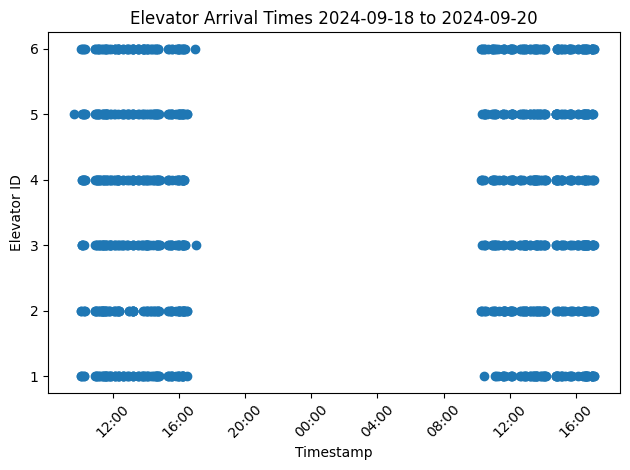

   Elevator ID  Arrivals per Second
0            3             0.002141
1            2             0.002060
2            5             0.002002
3            4             0.001991
4            6             0.001968
5            1             0.001921
Average distance waiting at center: 2.1637931034482762
Average distance waiting at the optimal location: 2.1638931961791936
               Average Distance Walked (m)  Training Data  Test Data
0                                 [3, 1.5]       2.164628   2.163793
1  [3.061162383252304, 1.4633491878532365]       2.163914   2.163893


In [6]:
start_date = '2024-09-18'
end_date = '2024-09-20'
plot_in_range(start_date, end_date)

gaps = [
    ('2024-09-18 00:00:00', '2024-09-18 08:00:00'),  # morning gap 9/18
    ('2024-09-18 17:00:00', '2024-09-19 09:00:00'),  # overnight gap 9/18-19
]
frequency_table = get_freq_table(start_date, end_date, gaps)
print(frequency_table)

probability_table = get_prob_table(frequency_table)

new_avg_distance_q1 = get_average_walk_distance(probability_table, (3,1.5))
print(f"Average distance waiting at center: {new_avg_distance_q1}")

# Calculate the average walk distance for the optimal location from question 5
new_avg_distance_q5 = get_average_walk_distance(probability_table, optimal_location)
print(f"Average distance waiting at the optimal location: {new_avg_distance_q5}")

# Define the data
data = {
    'Average Distance Walked (m)': [[3,1.5], optimal_location],
    'Training Data': [avg_distance_q1, avg_distance_q5],
    'Test Data': [new_avg_distance_q1, new_avg_distance_q5]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)